In [ ]:
import os

# Caminho base onde estão armazenadas as imagens organizadas em subpastas
base_path = "data/real-vs-fake"

# Conjuntos de dados
subsets = ["train", "test", "valid"]

# Classes presentes no dataset
classes = ["real", "fake"]

# Inicializa um dicionário para contar o número de imagens por classe e por conjunto
total_counts = {
    "train": {"real": 0, "fake": 0},
    "test": {"real": 0, "fake": 0},
    "valid": {"real": 0, "fake": 0}
}

# Percorre cada combinação de conjunto (train/test/valid) e classe (real/fake)
for subset in subsets:
    for cls in classes:
        path = os.path.join(base_path, subset, cls)  # Caminho completo da pasta
        if os.path.exists(path):
            # Conta apenas arquivos .jpg
            count = len([f for f in os.listdir(path) if f.lower().endswith('.jpg')])
            total_counts[subset][cls] = count
        else:
            print(f" Pasta não encontrada: {path}")

# Exibe os resultados por conjunto
for subset in subsets:
    real = total_counts[subset]["real"]
    fake = total_counts[subset]["fake"]
    total = real + fake
    print(f"\n {subset.upper()}:")
    print(f" - Imagens reais: {real}")
    print(f" - Imagens falsas: {fake}")
    print(f" - Total: {total}")

# Soma total de imagens em todos os conjuntos
total_real = sum(total_counts[s]["real"] for s in subsets)
total_fake = sum(total_counts[s]["fake"] for s in subsets)
print(f"\n Total geral de imagens reais: {total_real}")
print(f" Total geral de imagens falsas: {total_fake}")
print(f" Total geral de imagens: {total_real + total_fake}")



 TRAIN:
 - Imagens reais: 5000
 - Imagens falsas: 5000
 - Total: 10000

 TEST:
 - Imagens reais: 1000
 - Imagens falsas: 1000
 - Total: 2000

 VALID:
 - Imagens reais: 1000
 - Imagens falsas: 1000
 - Total: 2000

 Total geral de imagens reais: 7000
 Total geral de imagens falsas: 7000
 Total geral de imagens: 14000


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from CDCNs import CDCNpp, CDCN, Conv2d_cd
from load_real_fake_dataset import RealFakeDataset
import torch.optim as optim
from tqdm import tqdm

# Carrega os datasets de treino, validação e teste
train_dataset = RealFakeDataset('data/real-vs-fake/train')
val_dataset   = RealFakeDataset('data/real-vs-fake/valid')
test_dataset  = RealFakeDataset('data/real-vs-fake/test')

# Cria os data loaders com batch size 3
train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=3, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=3, shuffle=False)


In [11]:
# Instanciar modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CDCN(basic_conv=Conv2d_cd, theta=0.7)
model = model.to(device)

In [12]:
# Função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
import numpy as np

# Número de épocas de treinamento
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Coloca o modelo em modo de treinamento
    total_loss = 0

    # Loop pelos batches de treinamento
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass pelo modelo; map_x é o mapa de ativação de saída
        map_x, *_ = model(images)

        # Calcula a média do mapa para cada imagem (batch_size,)
        outputs = torch.mean(map_x.view(map_x.size(0), -1), dim=1)

        # Cria logits binários: [1 - output, output]
        logits = torch.stack([1 - outputs, outputs], dim=1)

        # Calcula a perda
        loss = criterion(logits, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Mostra o erro médio da época
    print(f"Epoch {epoch+1}: Loss = {total_loss / len(train_loader):.4f}")

# Salva os pesos do modelo treinado
torch.save(model.state_dict(), "cdcn_real_fake.pth")

/var/folders/r2/n_40xqps303d4xb908b68yfc0000gn/T/ipykernel_30369/28940799.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model/cdcn_r

imagem 1
imagem 2
imagem 3
imagem 4
imagem 5
imagem 6
imagem 7
imagem 8
imagem 9
imagem 10
imagem 11
imagem 12
imagem 13
imagem 14
imagem 15
imagem 16
imagem 17
imagem 18
imagem 19
imagem 20
imagem 21
imagem 22
imagem 23
imagem 24
imagem 25
imagem 26
imagem 27
imagem 28
imagem 29
imagem 30
imagem 31
imagem 32
imagem 33
imagem 34
imagem 35
imagem 36
imagem 37
imagem 38
imagem 39
imagem 40
imagem 41
imagem 42
imagem 43
imagem 44
imagem 45
imagem 46
imagem 47
imagem 48
imagem 49
imagem 50
imagem 51
imagem 52
imagem 53
imagem 54
imagem 55
imagem 56
imagem 57
imagem 58
imagem 59
imagem 60
imagem 61
imagem 62
imagem 63
imagem 64
imagem 65
imagem 66
imagem 67
imagem 68
imagem 69
imagem 70
imagem 71
imagem 72
imagem 73
imagem 74
imagem 75
imagem 76
imagem 77
imagem 78
imagem 79
imagem 80
imagem 81
imagem 82
imagem 83
imagem 84
imagem 85
imagem 86
imagem 87
imagem 88
imagem 89
imagem 90
imagem 91
imagem 92
imagem 93
imagem 94
imagem 95
imagem 96
imagem 97
imagem 98
imagem 99
imagem 100
imagem 1

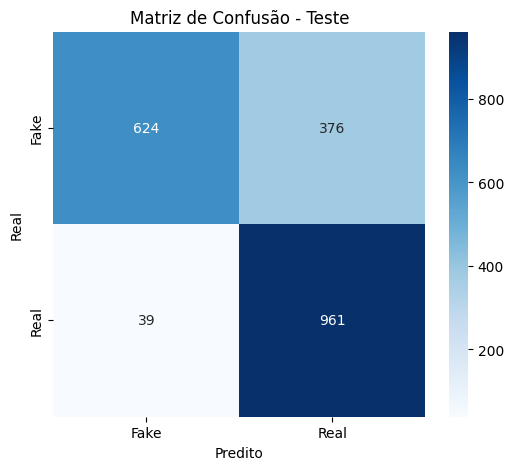

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

all_preds = []
all_labels = []

# Define o dispositivo: GPU se disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instancia o modelo e carrega os pesos treinados
model = CDCN(basic_conv=Conv2d_cd, theta=0.7).to(device)
model.load_state_dict(torch.load("model/cdcn_real_fake.pth", map_location=device))

# Define limiar para classificar como real (> 0.5)
limiar = 0.5
model.eval()  # Coloca o modelo em modo de avaliação

i = 1
with torch.no_grad():
    for images, labels in test_loader:
        print(f'batch {i}')
        i += 1

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        map_x, *_ = model(images)

        # Score médio por imagem
        scores = torch.mean(map_x.view(map_x.size(0), -1), dim=1)

        # Converte os scores em classes (0 = fake, 1 = real)
        preds = (scores > limiar).long()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Avaliação
print("fazendo matriz de confusão")

# Matriz de confusão
cm = confusion_matrix(all_labels, all_preds)
print("Matriz de Confusão:")
print(cm)

# Relatório com precisão, recall, f1-score
print("\nRelatório de Classificação:")
print(classification_report(all_labels, all_preds, target_names=["Fake", "Real"]))

# Visualização da matriz com seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste")
plt.show()
